## CSCI 470 Activities and Case Studies

1. For all activities, you are allowed to collaborate with a partner. 
1. For case studies, you should work individually and are **not** allowed to collaborate.

By filling out this notebook and submitting it, you acknowledge that you are aware of the above policies and are agreeing to comply with them.

Some considerations with regard to how these notebooks will be graded:

1. You can add more notebook cells or edit existing notebook cells other than "# YOUR CODE HERE" to test out or debug your code. We actually highly recommend you do so to gain a better understanding of what is happening. However, during grading, **these changes are ignored**. 
2. You must ensure that all your code for the particular task is available in the cells that say "# YOUR CODE HERE"
3. Every cell that says "# YOUR CODE HERE" is followed by a "raise NotImplementedError". You need to remove that line. During grading, if an error occurs then you will not receive points for your work in that section.
4. If your code passes the "assert" statements, then no output will result. If your code fails the "assert" statements, you will get an "AssertionError". Getting an assertion error means you will not receive points for that particular task.
5. If you edit the "assert" statements to make your code pass, they will still fail when they are graded since the "assert" statements will revert to the original. Make sure you don't edit the assert statements.
6. We may sometimes have "hidden" tests for grading. This means that passing the visible "assert" statements is not sufficient. The "assert" statements are there as a guide but you need to make sure you understand what you're required to do and ensure that you are doing it correctly. Passing the visible tests is necessary but not sufficient to get the grade for that cell.
7. When you are asked to define a function, make sure you **don't** use any variables outside of the parameters passed to the function. You can think of the parameters being passed to the function as a hint. Make sure you're using all of those variables.
8. Finally, **make sure you run "Kernel > Restart and Run All"** and pass all the asserts before submitting. If you don't restart the kernel, there may be some code that you ran and deleted that is still being used and that was why your asserts were passing.

# Computer Vision

For computer vision related tasks, we will use the [OpenCV library](https://opencv.org/).
You can install OpenCV by running `pip install opencv-python`. This will install the base library. To install additional portions of it and get access to SIFT and other methods, you'll need to also run `pip install opencv-contrib-python`. You can run both in one command, `pip install opencv-python opencv-contrib-python`.

For this exercise, most of the code is provided from examples in the OpenCV documentation.

In [132]:
# ! pip install opencv-python==3.4.2.17
# ! pip install opencv-contrib-python==3.4.2.17

In [133]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import urllib.request

To read a local image you can use `cv2.imread(path)`. To read an image from a URL we will use the below function. One thing to note about OpenCV is that the RGB format it uses is BGR which may be different from what other tools expect to interface with in terms of ordering.

In [134]:
# Code from https://www.pyimagesearch.com/2015/03/02/convert-url-to-image-with-python-and-opencv/
def url_to_image(url):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
    # return the image
    return image

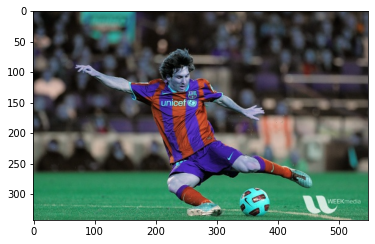

In [135]:
url = "https://github.com/opencv/opencv/blob/master/samples/data/messi5.jpg?raw=true"
img = url_to_image(url)

plt.imshow(img)
plt.show()

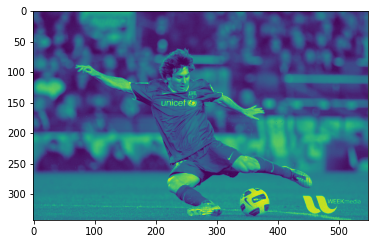

In [136]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
plt.imshow(gray)
plt.show()

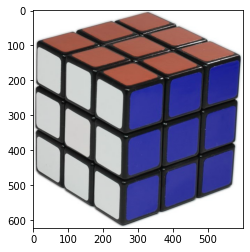

In [137]:
# url = 'https://github.com/opencv/opencv/blob/master/samples/data/blox.jpg?raw=true'
url = "https://qph.fs.quoracdn.net/main-qimg-03e4eff680fb326985c1b2aa741d977c-c"
img = url_to_image(url)

plt.imshow(img)
plt.show()

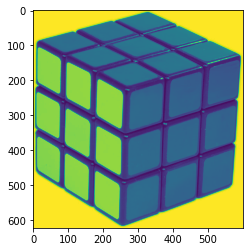

In [138]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
plt.imshow(gray)
plt.show()

Check out [the guide](https://docs.opencv.org/3.4.3/dc/d0d/tutorial_py_features_harris.html) on using Harris for corner detection as well as the function's [documentation](https://docs.opencv.org/3.4.3/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345).

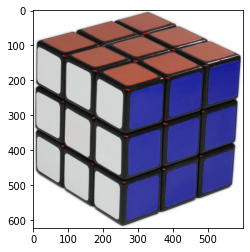

In [139]:
# Determine the harris scores and save to harris
harris = cv2.cornerHarris(gray, 2, 3, 0.04)
# raise NotImplementedError()

# Threshold for an optimal value, it may vary depending on the image.
harrisImg = np.copy(img)
# Set values past a threshold to a red dot, try changing this value
threshold = 0.01*harris.max()
harrisImg[harris>threshold]=[255,0,0]

plt.imshow(harrisImg)
plt.show()

In [140]:
assert harris.shape == gray.shape

Check out [the guide](https://docs.opencv.org/3.4.3/d4/d8c/tutorial_py_shi_tomasi.html) on Shi-Tomasi corner detection and the function's [documentation](https://docs.opencv.org/3.4.3/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541).

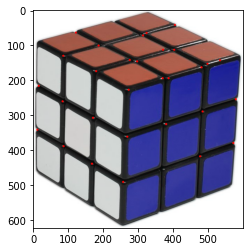

In [141]:
# Calculate the Shi-Tomasi corners with a maximum number of 30 corners and set them to corners
corners = cv2.goodFeaturesToTrack(gray, 30, 0.01, 10)
# raise NotImplementedError()

corners = np.int0(corners)
stImg = np.copy(img)
for i in corners:
    x,y = i.ravel()
    cv2.circle(stImg,(x,y),3,255,-1)
plt.imshow(stImg)
plt.show()

In [142]:
assert corners.shape == (30, 1, 2)

With SIFT, SURF, FAST, BRIEF, ORB, and other keypoint detection methods, OpenCV implements the following API:

```python
m = method_create(params)
keyPoints = m.detect(image)
newImage = cv2.draw_keypoints(image, keyPoints, color=(red, green, blue)) 
```

- [detect docs](https://docs.opencv.org/3.4.3/d0/d13/classcv_1_1Feature2D.html#aa4e9a7082ec61ebc108806704fbd7887)
- [draw_keypoints docs](https://docs.opencv.org/3.4.3/d4/d5d/group__features2d__draw.html#gab958f8900dd10f14316521c149a60433)

This creates a method with specific parameters and uses that to detect key points in an image. The keypoints are then drawn on top of the image and returned in a new image that can be displayed.

SIFT and SURF are patented and may not work on colab. The respective guides are linked below with code to work with both of them in the next cells. You can install OpenCV locally with the appropriate flags to build those functions and see the results. For the exercise, this is just to familiarize you with the API when using SIFT and SURF which is similar to using FAST, BRIEF, and ORB later on.

- [SIFT guide](https://docs.opencv.org/3.4.3/da/df5/tutorial_py_sift_intro.html)
- [SURF guide](https://docs.opencv.org/3.4.3/df/dd2/tutorial_py_surf_intro.html)

In [143]:
try:
    sift = cv2.xfeatures2d.SIFT_create()
    kp = sift.detect(gray,None)
    siftImg=cv2.drawKeypoints(gray, kp, img)
    plt.imshow(siftImg)
except Exception as e:
    print(e)

OpenCV(4.1.2) /io/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'



In [144]:
try:
    surf = cv2.xfeatures2d.SURF_create(400)
    kp=surf.detect(gray, None)
    surfImg = cv2.drawKeypoints(img,kp,None,(255,0,0),4) # Will draw red dots at the keypoints
    plt.imshow(surfImg)
    
except Exception as e:
      print(e)

OpenCV(4.1.2) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1029: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'



Check out [the guide](https://docs.opencv.org/3.4.3/df/d0c/tutorial_py_fast.html) on FAST.

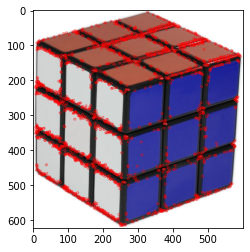

In [145]:
# Create a FAST feature detector and save it to fast
# Determine the keypoints using the detector and save them to fastKp
# Create a new image with red dots drawn over the key points, save it to fastImg

fast = cv2.FastFeatureDetector_create()
fastKp = fast.detect(img,None)
fastImg = cv2.drawKeypoints(img, fastKp, None, color=(255,0,0))
# raise NotImplementedError()

plt.imshow(fastImg)
plt.show()

In [146]:
assert fast
assert len(fastKp) > 10
assert fastImg.shape == img.shape

Check out [the guide](https://docs.opencv.org/3.4.3/dc/d7d/tutorial_py_brief.html) on BRIEF. BRIEF is different from the other methods in that it needs a starting method to detect the key points and then it can update them based on its computation.

It follows the structure outlined below:

```python
fm = feature_method_create(params)
keyPoints = fm.detect(image)
cm = compute_method_create(params)
updatedKeypoints, descriptors = cm.compute(image, keypoints)
```

Descriptors here are the updated feature vectors for the keypoints.

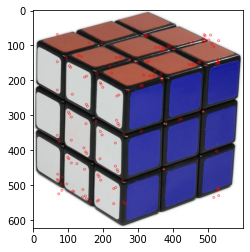

We have 143 key points each with a 32-dim vector resulting in a descriptor of shape (143, 32).


In [147]:
# Following the guide, and as recommended by the BRIEF paper, use star as the feature method
# Create the BRIEF descriptors for the keypoints
try:
    # Initiate FAST detector
    star = cv2.xfeatures2d.StarDetector_create()
    # Initiate BRIEF extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    # find the keypoints with STAR
    kp = star.detect(img,None)
    # compute the descriptors with BRIEF
    kp, briefDes = brief.compute(img, kp)

    starImg =  cv2.drawKeypoints(img, kp, None, color=(255,0,0))
    plt.imshow(starImg)
    plt.show()
    
    print(f"We have {len(kp)} key points each with a 32-dim vector resulting in a descriptor of shape {briefDes.shape}.")

    
except Exception as e:
    print(e)

Check out [the guide](https://docs.opencv.org/3.4.3/d1/d89/tutorial_py_orb.html) on ORB. Since ORB provides both a detector and descriptor, we can use the [detectAndCompute method](https://docs.opencv.org/3.4.3/d0/d13/classcv_1_1Feature2D.html#a8be0d1c20b08eb867184b8d74c15a677). This method simply applies both the detecting portion and computation in the same method.

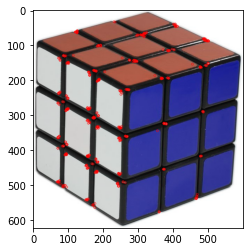

In [148]:
# Create the ORB object and save it to orb
# Determine the keypoints and descriptors using ORB and save them to orbKp, orbDes
# Draw the keypoints on the original image

orb = cv2.ORB_create()
kp = orb.detect(img,None)
orbKp, orbDes = orb.compute(img, kp)
orbImg = cv2.drawKeypoints(img, orbKp, orbDes, color=(255,0,0))
# raise NotImplementedError()


plt.imshow(orbImg)
plt.show()

In [149]:
assert orb
assert orbDes.shape == (len(orbKp),32)

Now find an image off the internet that you want to detect the corners of and scroll up and update the `img` variable. Re-run the code and check out the results.

Here are some good examples:

- Blocks: https://www.learningresources.com/images/products/en_us/detail/prod0136_dt.jpg
- Rubik's Cube: https://qph.fs.quoracdn.net/main-qimg-03e4eff680fb326985c1b2aa741d977c-c
- Legos: https://i1.wp.com/www.processmodel.com/wp-content/uploads/2018/02/lego-for-model-objects-1.jpg?fit=672%2C372&ssl=1

## Feedback

In [150]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    return("not too difficult but not too easy")
    # raise NotImplementedError()